<a href="https://colab.research.google.com/github/Nailab1/Fianl-Project/blob/master/Final_Tech_Project_NYC_Taxi_Fare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!wget https://www.dropbox.com/s/wz35bcpa4ag45vg/train_200000.csv

--2019-04-29 18:05:22--  https://www.dropbox.com/s/wz35bcpa4ag45vg/train_200000.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/wz35bcpa4ag45vg/train_200000.csv [following]
--2019-04-29 18:05:22--  https://www.dropbox.com/s/raw/wz35bcpa4ag45vg/train_200000.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0b67f25614ab4732e78f4dca00.dl.dropboxusercontent.com/cd/0/inline/Af_cy8DVkpjg_mQ_by9m2el1hYGLluVz1nRHucX2MJx3-vdUOUkZUiwyNWsTgcyu6euOdNt00naXDwbbtv7q8OmCmmPMaqdWFzJnY--Nx2J9Ng8HikrKFuxsCov9ydfhd-8/file# [following]
--2019-04-29 18:05:22--  https://uc0b67f25614ab4732e78f4dca00.dl.dropboxusercontent.com/cd/0/inline/Af_cy8DVkpjg_mQ_by9m2el1hYGLluVz1nRHucX2MJx3-vdUOUkZUiwyNWsTgcyu6euOdNt00naXDwbbtv7q8OmCmmPMaqdWFzJnY-

In [5]:
import pandas as pd
train_df = pd.read_csv("train_200000.csv") #imports file as pandas dataframe
train_df.head() #shows top few lines of dataframe



,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [7]:
from google.colab import files
uploaded=files.upload() #importing the Test file for submission

Saving test.csv to test.csv


In [8]:
import io
test_df=pd.read_csv(io.BytesIO(uploaded['test.csv'])) #imports Test file as dataframe
test_df.head() #shows top few lines of dataframe

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [9]:
train_df.describe() #Describing the data to see outliers

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.342877,-72.506121,39.922326,-72.518673,39.925579,1.682445
std,9.837855,11.608097,10.048947,10.724226,6.751120,1.306730
min,-44.900000,-736.550000,-3116.285383,-1251.195890,-1189.615440,0.000000
25%,6.000000,-73.992050,40.735007,-73.991295,40.734092,1.000000
50%,8.500000,-73.981743,40.752761,-73.980072,40.753225,1.000000
75%,12.500000,-73.967068,40.767127,-73.963508,40.768070,2.000000
max,500.000000,2140.601160,1703.092772,40.851027,404.616667,6.000000


In [103]:
train_df.drop(train_df.loc[train_df['fare_amount']<2.50].index, inplace=True) #removes all rides with fare under $2.50
print (len(train_df))
train_df.drop(train_df.loc[train_df['fare_amount']>100].index, inplace=True) #removes all rides with fare over $100
print (len(train_df)) #length after removing fare outliers
train_df.drop(train_df.loc[train_df['passenger_count']>7].index, inplace=True) #removes all rides with more than 7 passengers
train_df.drop(train_df.loc[train_df['passenger_count']<1].index, inplace = True) #removes all rides with less than 1 passenger
train_df.drop(train_df.loc[train_df['pickup_longitude']<-75].index, inplace=True) #the following lines of code limit the pickup and dropoff points to within NYC
train_df.drop(train_df.loc[train_df['pickup_longitude']>-72].index, inplace=True)
train_df.drop(train_df.loc[train_df['pickup_latitude']<40].index, inplace=True)
train_df.drop(train_df.loc[train_df['pickup_latitude']>42].index, inplace=True)
train_df.drop(train_df.loc[train_df['dropoff_longitude']<-75].index, inplace=True)
train_df.drop(train_df.loc[train_df['dropoff_longitude']>-72].index, inplace=True)
train_df.drop(train_df.loc[train_df['dropoff_latitude']<40].index, inplace=True)
train_df.drop(train_df.loc[train_df['dropoff_latitude']>42].index, inplace=True)
train_df.dropna() #remove all lines with N/A values
train_df.describe() #new description of dataframe

195057
195057


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Weekday,Manhattan_Distance,Hour
count,195057.000000,195057.000000,195057.000000,195057.000000,195057.000000,195057.000000,195057.000000,195057.000000,195057.000000
mean,11.286122,-73.975187,40.751129,-73.974110,40.751446,1.688758,3.124128,0.044167,13.517321
std,9.369799,0.039342,0.030470,0.038560,0.033521,1.305215,1.987419,0.053478,6.502851
min,2.500000,-74.968142,40.052722,-74.960020,40.041180,1.000000,0.000000,0.000000,0.000000
25%,6.000000,-73.992264,40.736642,-73.991472,40.735662,1.000000,1.000000,0.016400,9.000000
50%,8.500000,-73.982047,40.753525,-73.980507,40.753950,1.000000,3.000000,0.028200,14.000000
75%,12.500000,-73.968320,40.767545,-73.965188,40.768375,2.000000,5.000000,0.050700,19.000000
max,100.000000,-72.856968,41.800252,-72.854940,41.923820,6.000000,6.000000,1.537900,23.000000


In [11]:
import datetime
train_df["Full_Date"]= 0
for i in range (len(train_df)):
  train_df.iloc[i,8] = datetime.datetime.strptime(train_df.iloc[i,2], '%Y-%m-%d %H:%M:%S %Z')
train_df.head()

#Converts the pickup_datetime values into a datatime format

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Full_Date
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15 17:26:21
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05 16:52:16
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18 00:35:00
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21 04:30:42
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09 07:51:00


In [12]:
train_df["Weekday"] =0
for i in range (len(train_df)):
  train_df.iloc[i,9]= train_df.iloc[i,8].strftime("%w")
train_df.tail()

#created new column to label each ride with the weekday it was taken on

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Full_Date,Weekday
199995,2011-03-24 01:38:50.0000002,8.90,2011-03-24 01:38:50 UTC,-73.989939,40.729423,-73.990683,40.758504,1,2011-03-24 01:38:50,4
199996,2012-06-20 21:36:56.0000004,14.10,2012-06-20 21:36:56 UTC,-74.005021,40.739912,-73.961319,40.766701,3,2012-06-20 21:36:56,3
199997,2012-08-04 19:18:00.000000219,6.90,2012-08-04 19:18:00 UTC,-73.993203,40.752092,-74.003508,40.732282,1,2012-08-04 19:18:00,6
199998,2013-11-26 18:59:21.0000002,18.00,2013-11-26 18:59:21 UTC,-73.994411,40.750884,-73.978532,40.785599,1,2013-11-26 18:59:21,2
199999,2015-01-06 10:21:48.0000001,42.83,2015-01-06 10:21:48 UTC,-74.001656,40.730495,-73.865578,40.770958,4,2015-01-06 10:21:48,2


In [23]:
train_df["Hour"] = 0
for i in range(len(train_df)):
  train_df.iloc[i,11] = train_df.iloc[i,8].strftime("%H")

#created new column to label each ride wtih the hour in which it was taken

train_df.tail()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Full_Date,Weekday,Manhattan_Distance,Hour
199995,2011-03-24 01:38:50.0000002,8.90,2011-03-24 01:38:50 UTC,-73.989939,40.729423,-73.990683,40.758504,1,2011-03-24 01:38:50,4,01,01
199996,2012-06-20 21:36:56.0000004,14.10,2012-06-20 21:36:56 UTC,-74.005021,40.739912,-73.961319,40.766701,3,2012-06-20 21:36:56,3,21,21
199997,2012-08-04 19:18:00.000000219,6.90,2012-08-04 19:18:00 UTC,-73.993203,40.752092,-74.003508,40.732282,1,2012-08-04 19:18:00,6,19,19
199998,2013-11-26 18:59:21.0000002,18.00,2013-11-26 18:59:21 UTC,-73.994411,40.750884,-73.978532,40.785599,1,2013-11-26 18:59:21,2,18,18
199999,2015-01-06 10:21:48.0000001,42.83,2015-01-06 10:21:48 UTC,-74.001656,40.730495,-73.865578,40.770958,4,2015-01-06 10:21:48,2,10,10


In [24]:
train_df['Manhattan_Distance']=0
def manhattan_distance(x1, x2, y1, y2, p):
    return ((abs(x2 - x1) ** p) + (abs(y2 - y1)) ** p) ** (1 / p)

train_df['Manhattan_Distance'] = round(manhattan_distance(train_df['pickup_longitude'], train_df['dropoff_longitude'],train_df['pickup_latitude'], train_df['dropoff_latitude'],1), 4)
train_df.head()

#calulated the distance between the pickup and dropoff points using the longitude and latitude corrdoindates. Uses the Manhattan Distance equation.

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Full_Date,Weekday,Manhattan_Distance,Hour
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15 17:26:21,1,0.0117,17
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05 16:52:16,2,0.1075,16
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18 00:35:00,4,0.0192,00
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21 04:30:42,6,0.0294,04
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09 07:51:00,2,0.0272,07


In [25]:
train_df.dropna() #droping any N/A values that might have occured after distance calulation

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Full_Date,Weekday,Manhattan_Distance,Hour
0,2009-06-15 17:26:21.0000001,4.50,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15 17:26:21,1,0.0117,17
1,2010-01-05 16:52:16.0000002,16.90,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05 16:52:16,2,0.1075,16
2,2011-08-18 00:35:00.00000049,5.70,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18 00:35:00,4,0.0192,00
3,2012-04-21 04:30:42.0000001,7.70,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21 04:30:42,6,0.0294,04
4,2010-03-09 07:51:00.000000135,5.30,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09 07:51:00,2,0.0272,07
5,2011-01-06 09:50:45.0000002,12.10,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1,2011-01-06 09:50:45,4,0.0547,09
6,2012-11-20 20:35:00.0000001,7.50,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1,2012-11-20 20:35:00,2,0.0194,20
7,2012-01-04 17:22:00.00000081,16.50,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1,2012-01-04 17:22:00,3,0.0619,17
8,2012-12-03 13:10:00.000000125,9.00,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1,2012-12-03 13:10:00,1,0.0183,13
9,2009-09-02 01:11:00.00000083,8.90,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2,2009-09-02 01:11:00,3,0.0351,01


In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

lr=LinearRegression()

X_train, X_valid, y_train, y_valid = train_test_split(train_df, np.array(train_df['fare_amount']), 
                                                      random_state = 0, test_size = 10_000)

train_df.replace([np.inf, -np.inf], np.nan).dropna(subset=["Manhattan_Distance"], how="all") #removing all possible infitnity values



,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Full_Date,Weekday,Manhattan_Distance,Hour
0,2009-06-15 17:26:21.0000001,4.50,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15 17:26:21,1,0.0117,17
1,2010-01-05 16:52:16.0000002,16.90,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05 16:52:16,2,0.1075,16
2,2011-08-18 00:35:00.00000049,5.70,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18 00:35:00,4,0.0192,00
3,2012-04-21 04:30:42.0000001,7.70,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21 04:30:42,6,0.0294,04
4,2010-03-09 07:51:00.000000135,5.30,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09 07:51:00,2,0.0272,07
5,2011-01-06 09:50:45.0000002,12.10,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1,2011-01-06 09:50:45,4,0.0547,09
6,2012-11-20 20:35:00.0000001,7.50,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1,2012-11-20 20:35:00,2,0.0194,20
7,2012-01-04 17:22:00.00000081,16.50,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1,2012-01-04 17:22:00,3,0.0619,17
8,2012-12-03 13:10:00.000000125,9.00,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1,2012-12-03 13:10:00,1,0.0183,13
9,2009-09-02 01:11:00.00000083,8.90,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2,2009-09-02 01:11:00,3,0.0351,01


In [101]:
lr.fit(X_train[['passenger_count', 'Hour', 'Manhattan_Distance', 'Weekday']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [100]:
lr.fit(X_train[['passenger_count', 'Hour', 'Manhattan_Distance', 'Weekday']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [76]:
#First Model, Linear Regression

from sklearn.metrics import mean_squared_error

train_pred = lr.predict(X_train[['passenger_count', 'Hour', 'Manhattan_Distance', 'Weekday']])
print (train_pred)
valid_pred = lr.predict(X_valid[['passenger_count', 'Hour', 'Manhattan_Distance', 'Weekday']])
    
# calculating the Root mean squared error
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
valid_rmse = np.sqrt(mean_squared_error(y_valid, valid_pred))
Round_TrainRmse = round(train_rmse, 4)
Round_ValidRmse = round(valid_rmse, 4)
print ("Training RMSE is: %s" %Round_TrainRmse)
print ("Validation RMSE is: %s" %Round_ValidRmse)



[6.56418931 6.15908504 7.24880101 ... 9.15690907 6.30616177 7.56195011]
Training RMSE is: 5.5313
Validation RMSE is: 5.1837


In [72]:
#calculating the naive base model
lr.fit(X_train[['Manhattan_Distance']], y_train)
print (lr.intercept_, 4)
naivetrain_pred=lr.predict(X_train[['Manhattan_Distance']])
print (naivetrain_pred)
naivevalid_pred=lr.predict(X_valid[['Manhattan_Distance']])

naivetrain_rmse=round(np.sqrt(mean_squared_error(y_train, naivetrain_pred)), 4)
naivevalid_rmse=round(np.sqrt(mean_squared_error(y_valid, naivevalid_pred)), 4)
print (naivetrain_rmse)
print (naivevalid_rmse)



5.053218009614407 4
[6.66136763 6.18174406 7.0845649  ... 9.18644467 6.25227694 7.56418847]
5.5319
5.1844


In [73]:
#Second Model Random Forest

from sklearn.ensemble import RandomForestRegressor

#Creating the random forest
randomforest= RandomForestRegressor(n_estimators = 30, max_depth = 30, 
                                      max_features = None, oob_score = True, 
                                      bootstrap = True, verbose = 1, n_jobs = -1)

randomforest.fit(X_train[['Manhattan_Distance','passenger_count', 'Hour', 'Weekday']], y_train)
randomforesttrain_pred=randomforest.predict(X_train[['Manhattan_Distance','passenger_count', 'Hour', 'Weekday']])
randomforestvalid_pred=randomforest.predict(X_valid[['Manhattan_Distance','passenger_count', 'Hour', 'Weekday']])

randomforesttrain_rmse=round(np.sqrt(mean_squared_error(y_train, randomforesttrain_pred)), 4)
randomforestvalid_rmse=round(np.sqrt(mean_squared_error(y_valid, randomforestvalid_pred)), 4)

print (randomforesttrain_rmse)
print (randomforestvalid_rmse)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    9.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    2.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.2s finished


2.6766
4.8688


In [66]:

#changing hour column
for i in range(len(train_df)):
  train_df.iloc[i,11] = int(train_df.iloc[i,11])
train_df.head()
  



,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Full_Date,Weekday,Manhattan_Distance,Hour
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15 17:26:21,1,0.0117,17
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05 16:52:16,2,0.1075,16
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18 00:35:00,4,0.0192,0
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21 04:30:42,6,0.0294,4
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09 07:51:00,2,0.0272,7


In [78]:
for i in range (len(train_df)):
  train_df.iloc[i,9]= int(train_df.iloc[i,9])
train_df.tail()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Full_Date,Weekday,Manhattan_Distance,Hour
199995,2011-03-24 01:38:50.0000002,8.90,2011-03-24 01:38:50 UTC,-73.989939,40.729423,-73.990683,40.758504,1,2011-03-24 01:38:50,4,0.0298,1
199996,2012-06-20 21:36:56.0000004,14.10,2012-06-20 21:36:56 UTC,-74.005021,40.739912,-73.961319,40.766701,3,2012-06-20 21:36:56,3,0.0705,21
199997,2012-08-04 19:18:00.000000219,6.90,2012-08-04 19:18:00 UTC,-73.993203,40.752092,-74.003508,40.732282,1,2012-08-04 19:18:00,6,0.0301,19
199998,2013-11-26 18:59:21.0000002,18.00,2013-11-26 18:59:21 UTC,-73.994411,40.750884,-73.978532,40.785599,1,2013-11-26 18:59:21,2,0.0506,18
199999,2015-01-06 10:21:48.0000001,42.83,2015-01-06 10:21:48 UTC,-74.001656,40.730495,-73.865578,40.770958,4,2015-01-06 10:21:48,2,0.1765,10


In [99]:
#Third Model XGB Regressor

X_train, X_valid, y_train, y_valid = train_test_split(train_df, np.array(train_df['fare_amount']), 
                                                      random_state = 0, test_size = 10_000)
from xgboost import XGBRegressor
xgb= XGBRegressor()

xgb.fit(X_train[['passenger_count', 'Hour', 'Manhattan_Distance', 'Weekday']], y_train)

boosttrain= xgb.predict(X_train[['passenger_count', 'Hour', 'Manhattan_Distance', 'Weekday']])
boostvalid= xgb.predict(X_valid[['passenger_count', 'Hour', 'Manhattan_Distance', 'Weekday']])

boosttrain_rmse=round(np.sqrt(mean_squared_error(y_train, boosttrain)), 4)
boostvalid_rmse=round(np.sqrt(mean_squared_error(y_valid, boostvalid)), 4)
print (boosttrain_rmse)
print (boostvalid_rmse)


4.3837
4.357


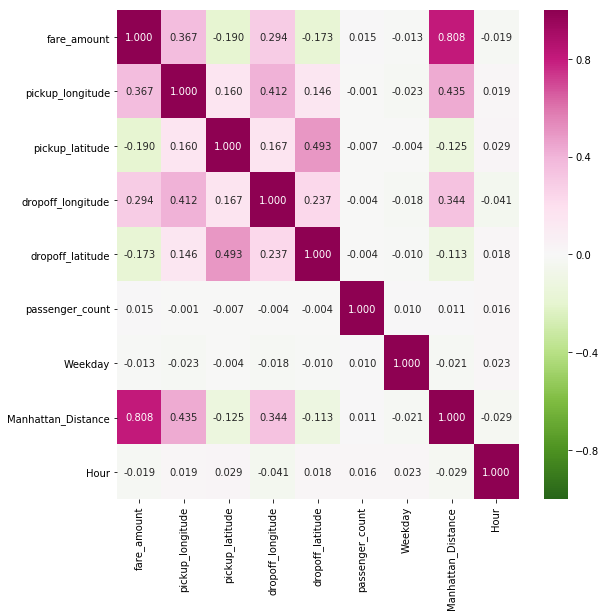

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

corrs= train_df.corr()

plt.figure(figsize = (9, 9))
sns.heatmap(corrs, annot = True, vmin = -1, vmax = 1, fmt = '.3f', cmap=plt.cm.PiYG_r);